# 지연벗
주택의 침실 개수, 지하철 역으로부터 떨어진 정도, 엘리베이터 유무 등의 데이터로 주택의 임대료(rent)
를 예측하여라.  
1. Pandas를 이용하여 manhattan.csv 데이터 불러오기  
2. train_test_split을 통해 테스트 train 데이터와 test 데이터를 8:2 비율로 나누기  
3. LinearRegression 모델 생성하기 (실제로 생성한 모델이 주택의 임대료를 잘 예측하는지만 확인
하고 싶기 때문에 복잡한 다중회귀를 사용하지 않고, 단순선형회귀 사용)  
4. Matplotlib을 통해 실제 임대료와 예측한 임대료가 얼마나 차이가 나는지 확인(plot를 이용해도
되지만 scatter를 이용하면 쉽게 산점도 그리기 가능. 아래 예시와 같은 모양이 나오게 그리기)  

In [1]:
import pandas as pd
df = pd.read_csv('data/manhattan.csv')
df

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,7582,4210,1.0,1,532,3,8.0,16,1,1,1,1,1,1,0,1,Chelsea,Manhattan
3535,5686,6675,2.0,2,988,5,10.0,9,1,1,1,1,1,1,0,1,Tribeca,Manhattan
3536,9679,1699,0.0,1,250,2,5.0,96,0,0,0,0,0,0,0,0,Little Italy,Manhattan
3537,5188,3475,1.0,1,651,6,5.0,14,1,0,1,1,1,1,0,1,Midtown West,Manhattan


In [2]:
manhattan_data = df.drop(['rental_id', 'neighborhood', 'borough'], axis = 1)

In [3]:
from sklearn.model_selection import train_test_split

train_data = manhattan_data.drop(['rent'], axis = 1)
target_data = manhattan_data['rent']

x_train, x_test, y_train, y_test = train_test_split(train_data, target_data, test_size = 0.2)

In [4]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(x_train, y_train) # 학습 .fit( , )

print('train set score', lr.score(x_train, y_train)) # 점수 .score( , )

train set score 0.7807147657559728


In [5]:
predicted_rent = lr.predict(x_test)
predicted_rent

array([ 3830.15093835,  7138.76322207,  9603.4907316 ,  4514.63154103,
        3996.74020551,  3470.64120224,  9078.7754687 ,  5564.66395133,
        3867.31995554,  2587.38325386,  3944.24651897,  2306.11707625,
        4108.89274822,  4343.83301952,  3729.64214562,  4051.31174211,
        7581.95471393,  6103.82925105,  5634.26804643,  7073.81328985,
        4792.39882132,  3780.43033093,  3954.1996411 ,  2748.46311708,
        3908.12081434,  7977.4013785 ,  7663.01169925,  3550.50570603,
        5543.99169547,  3740.30258121, 11225.05848406,  4498.68514913,
        2389.96178073,  4301.19586912,  3602.22909603,  3051.34349471,
        3476.40002056,  6992.79379313,  3224.4868792 ,  6529.07219495,
        3881.83871382,  3576.99624505,  4546.4893853 ,  2826.29784581,
        3924.41533871,  3117.90057127,  4012.63186228,  1933.64980336,
        2107.00655415,  5039.3067442 ,  5205.13767719,  3472.56465497,
        2431.84920941,  3108.25618681,  2932.61378141,  4686.09239239,
      

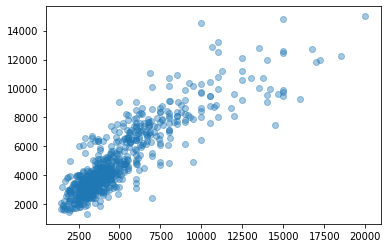

In [6]:
import matplotlib.pyplot as plt
plt.scatter(y_test, predicted_rent, alpha = 0.4)

# 혜원벗
![](https://trello-attachments.s3.amazonaws.com/5ea016063a80ad673bda05f6/5ea01e3f9dfdc63157f41215/2a3d737335fab45081329764e973fb39/Part2_-_WEEK5_review_%EB%AC%B8%EC%A0%9C.jpg)

In [7]:
import pandas as pd
df = pd.read_csv('data/house.csv')
df = df.drop(['id'], axis = 1)

In [8]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


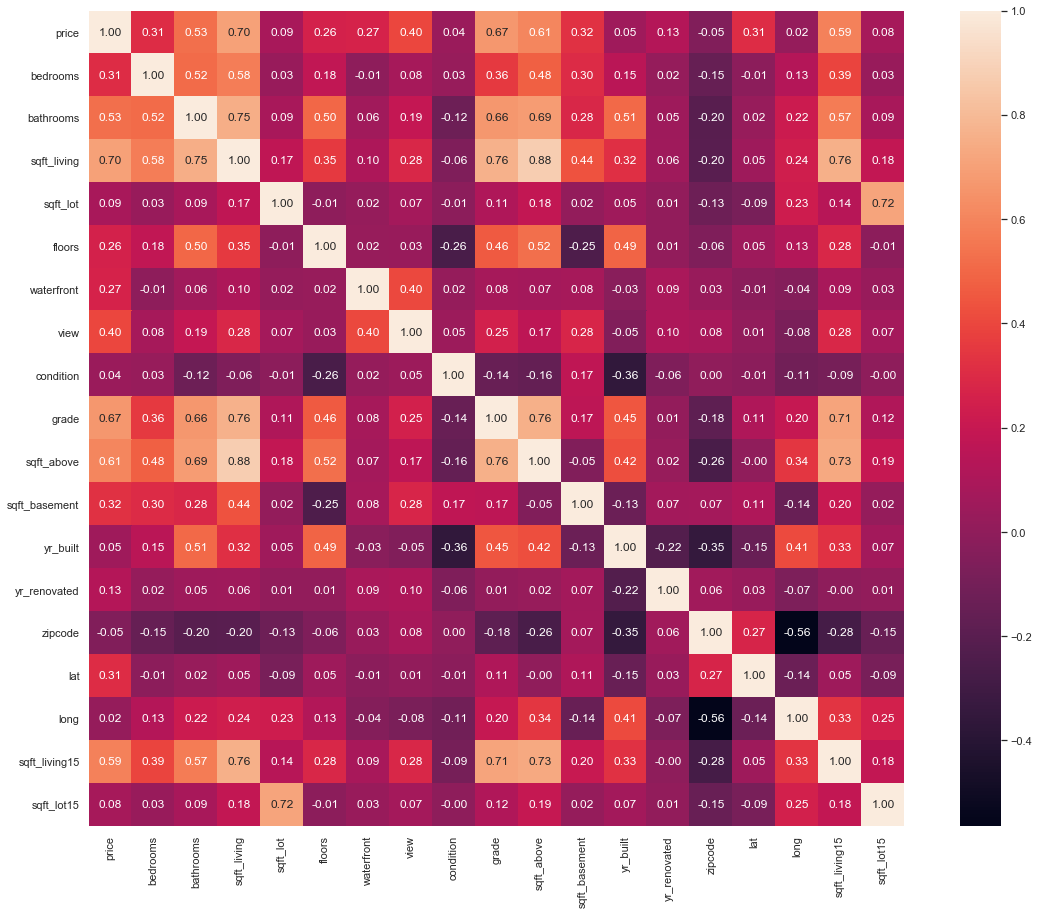

In [9]:
import matplotlib.pyplot as plt

import seaborn as sns

sns.set()

plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, fmt='.2f', square = True)
plt.show()

In [11]:
x_train = df[['sqft_living15', 'sqft_above', 'grade', 'sqft_living', 'bathrooms']]
y_train = df['price']

In [12]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(x_train, y_train)

print('train set accuracy', lr.score(x_train, y_train))

train set accuracy 0.544219816528976


# 희준벗 
Logistic Regression  
data = [[2,0], [4,0], [6,0], [8,1], [10,1], [12,1], [14,1]]  
위 데이터를 갖고 ① 데이터의 산포도를 그리고 ②시그모이드 함수의 적절한 a, b값을 대입해 계산하여 ③오차제곱의 합을 계산하고 (이건 challenge 1의 식과 완전 동일합니다!), ④ 시그모이드 함수 그래프를 그려 주세요!  

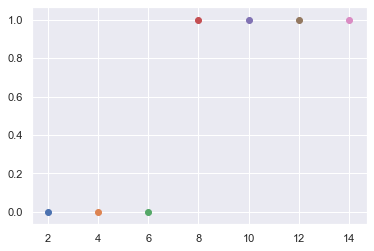

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import math 

data = [[2,0], [4,0], [6,0], [8,1], [10,1], [12,1], [14,1]]
sums = 0

for (x,y) in data: 
    plt.scatter(x, y)



In [33]:
# 오차제곱 합
for (x,y) in data: 
    a = -5
    b = 35
    # y = 1/(1 + np.e**(a*x + b))
    predict = 1/(1 + np.e**(a*x + b))
    sums += (y - predict)**2
print(sums)

8.9588507176552e-05


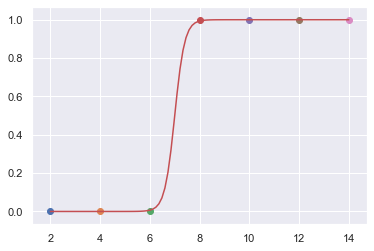

In [34]:
# 시그모이드 함수 그래프
x = np.linspace(2, 14, 100)
y = 1/(1 + np.e**(a*x + b))

plt.plot(x, y, 'r-')
for (x,y) in data: 
    plt.scatter(x, y)

# 미경벗
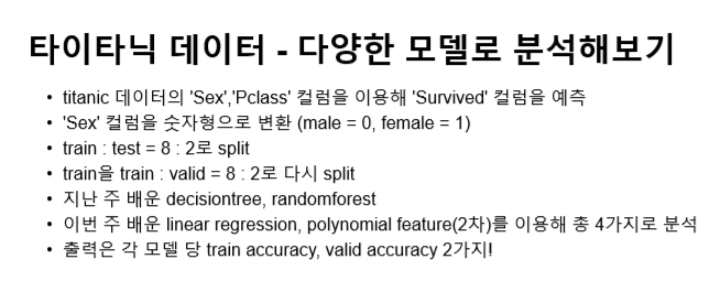

In [25]:
import pandas as pd
df = pd.read_csv('data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
df.loc[df['Sex'] == 'male', 'Sex'] = 0
df.loc[df['Sex'] == 'female', 'Sex'] = 1
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [27]:
from sklearn.model_selection import train_test_split

train_data = df[['Sex', 'Pclass']]
target_data = df['Survived']

x_train, x_test, y_train, y_test = train_test_split(train_data, target_data, test_size = 0.2)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.2)

In [28]:
# Decision Tree Regressor 
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor().fit(x_train, y_train)

print('train set score: ', tree.score(x_train, y_train))
print('valid set score: ', tree.score(x_valid, y_valid))

train set score:  0.40918533368240306
valid set score:  0.2961837845961244


In [29]:
# random forest
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 100 ) # 트리 개수
forest.fit(x_train, y_train) # 모델 학습
print('train set score', forest.score(x_train, y_train)) # 모델 정확도 출력
print('valid set score', forest.score(x_valid, y_valid)) # 모델 정확도 출력
forest.predict(x_test) # 예측한 라벨 출력

train set score 0.8031634446397188
valid set score 0.7482517482517482


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0], dtype=int64)

In [30]:
# linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression( ) # 모델 생성
lr.fit(x_train, y_train) # 모델 학습
print('train set score', lr.score(x_train, y_train)) # 모델 정확도 출력
print('valid set score', lr.score(x_valid, y_valid)) # 모델 정확도 출력
lr.predict(x_test) # 예측한 라벨 출력

train set score 0.3713971385874786
valid set score 0.29449337588900204


array([0.08047403, 0.59815857, 0.08047403, 0.08047403, 0.24022603,
       0.39997803, 0.24022603, 0.08047403, 0.08047403, 0.08047403,
       0.59815857, 0.08047403, 0.08047403, 0.59815857, 0.08047403,
       0.08047403, 0.39997803, 0.08047403, 0.08047403, 0.75791056,
       0.08047403, 0.08047403, 0.08047403, 0.08047403, 0.24022603,
       0.24022603, 0.08047403, 0.75791056, 0.08047403, 0.08047403,
       0.91766256, 0.08047403, 0.24022603, 0.08047403, 0.59815857,
       0.08047403, 0.39997803, 0.08047403, 0.24022603, 0.39997803,
       0.08047403, 0.59815857, 0.24022603, 0.91766256, 0.75791056,
       0.08047403, 0.08047403, 0.91766256, 0.08047403, 0.24022603,
       0.39997803, 0.75791056, 0.08047403, 0.75791056, 0.59815857,
       0.08047403, 0.08047403, 0.24022603, 0.91766256, 0.91766256,
       0.08047403, 0.08047403, 0.39997803, 0.08047403, 0.08047403,
       0.08047403, 0.24022603, 0.08047403, 0.59815857, 0.24022603,
       0.08047403, 0.59815857, 0.75791056, 0.39997803, 0.24022

In [31]:
# Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

model = make_pipeline(PolynomialFeatures(2), 
                     LinearRegression())

model.fit(x_train, y_train) # 학습

print('train set score', model.score(x_train, y_train)) # 성능 평가 .score( , )
print('valid set score', model.score(x_valid, y_valid))

train set score 0.39037265750487005
valid set score 0.3120940908056883


# 윤서벗
Stage 4에서는 train_data를 '나이','출장수','키','몸무게'로 정해서 linear_model 을 학습시켰습니다.  
하지만 ‘출장수’가 prediction에 영향을 미치는지는 모르기 때문에 이를 알아보고자 합니다.  
1. ['나이','출장수','키','몸무게']로 학습시킨 lr1 모델,
['나이','키','몸무게'] 로 학습시킨 lr2 모델을 만들고
2. 각각의 모델을 이용하여 train data를 분석해서
3. 예측한 값을 새로운 데이터프레임으로 만들어 비교해보세요!
(데이터프레임 만들어 비교하는 건 Challenge2 참고)

In [13]:
import pandas as pd
df = pd.read_csv('data/korean_players.csv')
df

,이름,적합사이즈,나이,출장수,키,몸무게
0,조현우,275,27,12,189,75
1,김영권,285,29,69,186,81
2,김민재,290,22,19,190,88
3,이청용,265,30,89,180,70
4,손흥민,260,26,79,183,77
5,이재성,275,26,43,180,70
6,백승호,280,22,0,180,68
7,이강인,270,18,0,173,63
8,이승우,260,21,10,170,63
9,황의조,275,26,25,184,73


In [21]:
x1_train = df[['나이', '출장수', '키', '몸무게']]
x2_train = df[['나이', '키', '몸무게']]

y_train = df['적합사이즈']

In [22]:
from sklearn.linear_model import LinearRegression

lr1 = LinearRegression().fit(x1_train, y_train)

print('train set accuracy: ', lr1.score(x1_train, y_train))

train set accuracy:  0.6550739388896691


In [23]:
from sklearn.linear_model import LinearRegression

lr2 = LinearRegression().fit(x2_train, y_train)

print('train set accuracy: ', lr2.score(x2_train, y_train))

train set accuracy:  0.555952209629257


In [24]:
comparison = pd.DataFrame(y_train)
comparison['출장수o'] = lr1.predict(x1_train)
comparison['출장수x'] = lr2.predict(x2_train)
comparison 

,적합사이즈,출장수o,출장수x
0,275,281.829639,280.106082
1,285,277.882881,275.379734
2,290,289.474580,288.850867
3,265,263.176528,265.491731
4,260,268.559816,274.509714
5,275,270.052410,269.870489
6,280,273.917114,273.925824
7,270,265.904555,269.312461
8,260,267.476237,262.521151
9,275,276.726240,275.031946
